In [1]:
import pandas as pd

## Entraînement d’un modèle simple (Random Forest)

In [3]:
%run "C:/Users/sebas/Documents/trading_bot_project/ml/features.ipynb"

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [9]:
df = pd.read_csv("C:/Users/sebas/Documents/trading_bot_project/data/btc_usdt.csv", parse_dates=["Date"], index_col="Date")
data = prepare_features(df)

In [11]:
X = data.drop("Target", axis=1)
y = data["Target"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)


In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5111111111111111


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.61      0.48        33
           1       0.67      0.46      0.54        57

    accuracy                           0.51        90
   macro avg       0.53      0.53      0.51        90
weighted avg       0.57      0.51      0.52        90



## Simuler une stratégie basée sur la prédiction ML

In [25]:
X_test['Prediction'] = y_pred
X_test['Real_Returns'] = df.loc[X_test.index, 'Close'].pct_change().shift(-1)
X_test['Strategy'] = X_test['Prediction'] * X_test['Real_Returns']

<Axes: title={'center': 'Strategy using ML Predictions'}, xlabel='Date'>

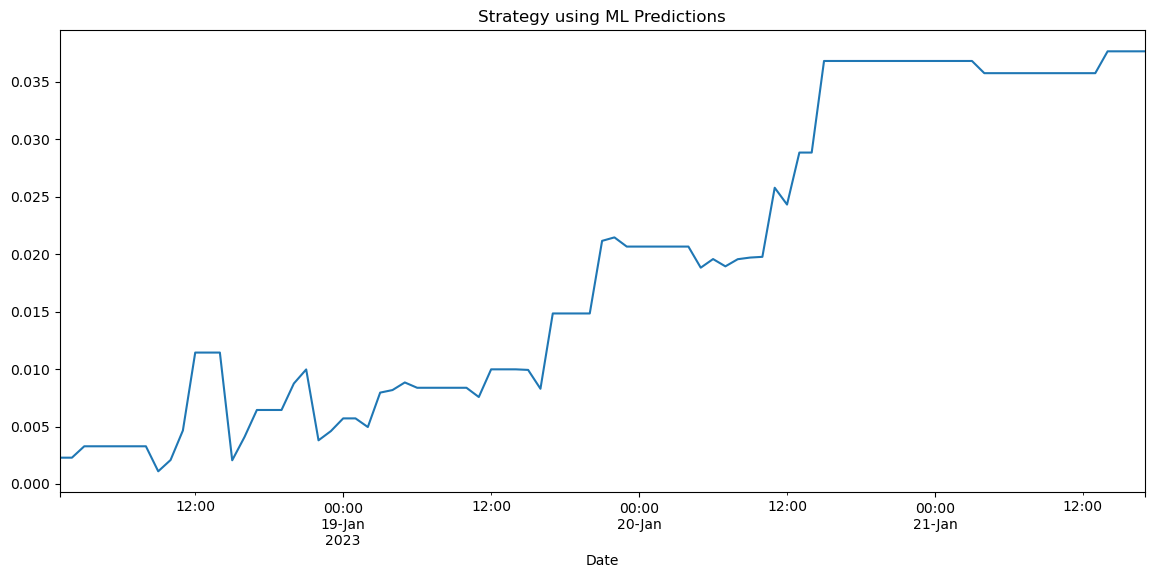

In [29]:
(X_test['Strategy'].dropna().cumsum()).plot(figsize=(14, 6), title="Strategy using ML Predictions")

### Sauvegarder le modèle

In [37]:
import joblib

In [39]:
MODEL_PATH = "C:/Users/sebas/Documents/trading_bot_project/ml/model_rf_100-42.pkl"

In [41]:
joblib.dump(model, MODEL_PATH)
print(f"✅ Modèle sauvegardé dans {MODEL_PATH}")

✅ Modèle sauvegardé dans C:/Users/sebas/Documents/trading_bot_project/ml/model_rf_100-42.pkl
